Assignment 1: write a program to rotate an image by a given angle (in radians) using bilinear interpolation

Start:
* load image
* set rotation angle 

In [1]:
import cv2
import numpy as np

# Load the image
img = cv2.imread("img_example.jpg")

# Set the rotation angle
ang = np.pi/3

Problem 1: [code by yourself]

Define a function `rotate_img()`, with the following input parameters and return variables:
* img (input): input image as a 3D numpy array of size (H,W,3)
* ang (input): rotation angle in radian
* img_out (output): output image as a 3D numpy array of size (H_out,W_out,3)

This function should include the following processes:
* Define a 2x2 rotation matrix as a numpy array for the given rotation angle 
* Compute output image size and the offset for the output image coordinates by computing the image corner coordinates after rotating the image
* Apply bilinear interpolation when determining the pixel values for the output image 



In [2]:
def rotate_img(img, ang):
  #1. compute rotation matrix
  r_matrix = np.array([[np.cos(ang), -np.sin(ang)],
                       [np.sin(ang), np.cos(ang)]])
  #2. compute output coordinates for image corners
  H, W, _ = img.shape
  corner_coord = np.array([[0, 0], [W-1, 0],
                     [0, H-1], [W-1, H-1]])
  # 회전된 이미지의 모서리 좌표
  r_corner = r_matrix.dot(corner_coord.T).T
  
  #3. compute output image size and offset
  # output image size 구하기 -> height, width길이 정수값으로 구하기
  x_min, y_min = np.min(r_corner, axis=0)
  x_max, y_max = np.max(r_corner, axis=0)
  H_out = int(np.ceil(y_max - y_min))
  W_out = int(np.ceil(x_max - x_min))
  
  # offset 구하기 -> 음수값으로 나온 좌표를 offset만큼 이동시켜 보정한다
  x_offset = -x_min
  y_offset = -y_min
  offset = np.array([x_offset, y_offset])
  
  #4. define output image object
  img_out = np.zeros((H_out, W_out, 3), dtype=img.dtype)
  
  # 회전행렬의 역행렬
  r_matrix2 = np.array([[np.cos(ang), np.sin(ang)],
                       [-np.sin(ang), np.cos(ang)]])
  
  for y_out in range(H_out) :
    for x_out in range(W_out) :
      x, y = np.dot(r_matrix2, (np.array([x_out, y_out]) - offset))
      x1, y1 = int(np.floor(x)), int(np.floor(y))
      x2, y2 = x1 + 1, y1 + 1
      
      if x1 >= 0 and x2 < img.shape[1] and y1 >= 0 and y2 < img.shape[0] and x >= 0 and y >= 0 :
        img_out[y_out, x_out] = (
          (x2 - x)*(y2 - y)*img[y1, x1] + (x - x1)*(y2 - y)*img[y1, x2] +
          (x2 - x)*(y - y1)*img[y2, x1] + (x - x1)*(y - y1)*img[y2, x2]
        )  
        
      else :
        img_out[y_out, x_out] = 255

  
  # for each output image coordinate, 
  # compute corresponding original image coordinate
  # get pixel value from original image with interpolation

  return img_out

Show the output:
* use matplotlib

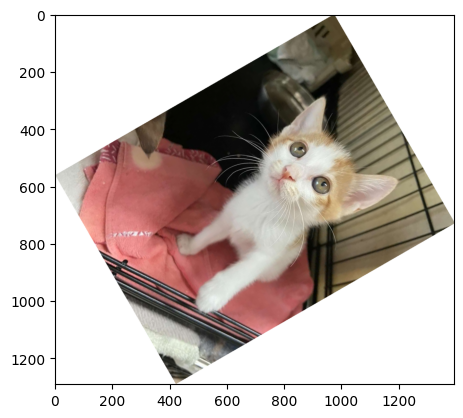

In [3]:
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB format

img_out = cv2.cvtColor(rotate_img(img, ang), cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(img_out)
plt.show()

> openCV 함수 이용(추가)

In [6]:
# openCV함수 활용해서 회전시키기
h, w, _ = img.shape
img2 = img.copy()

matrix = cv2.getRotationMatrix2D((w/2, h/2), 180, 1)
rotate_img = cv2.warpAffine(img2, matrix, (w, h))

cv2.imshow('rotation_img', rotate_img)
cv2.waitKey(0)
cv2.destroyAllWindows()